In [2]:
from PIL import Image
import zipfile

In [ ]:
f=zipfile.ZipFile('./cupdata.zip','r')
for file in f.namelist():
    f.extract(file,"./cupdata") #解压到的位置，./表示当前目录(与此.ipynb文件同一个目录)
f.close()

In [3]:
import os
import cv2
import numpy as np

In [4]:
def read_directory(directory_name):
    array_of_img=[]
    for filename in os.listdir(r"./"+directory_name):
        img = cv2.imread(directory_name + "/" + filename,0)
        array_of_img.append(img)
    return array_of_img

In [5]:
all_pic=read_directory('./cupdata')
all_pic = np.array(all_pic[1:])
print(all_pic.shape)

(8, 500, 600)


In [789]:
f=zipfile.ZipFile('./visualize_Test1.zip','r')
for file in f.namelist():
    f.extract(file) #解压到的位置，./表示当前目录(与此.ipynb文件同一个目录)
f.close()

In [753]:
#all_pic=all_pic[1:]

In [790]:
all_pic2=read_directory('./visualize_Test1.png')
#all_pic2=all_pic2[1:]
all_pic2 = np.array(all_pic2[1:])
print(all_pic2.shape)
#all_pic2[all_pic2 == 0] = 255
all_pic2[all_pic2 == 14] = 255
#print(sum(all_pic2[all_pic2 != 0]))

NotADirectoryError: [WinError 267] 目录名称无效。: '././visualize_Test1.png'

In [755]:
print(all_pic2[1])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [756]:
print(all_pic[1])

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [757]:
from matplotlib import pyplot as plt

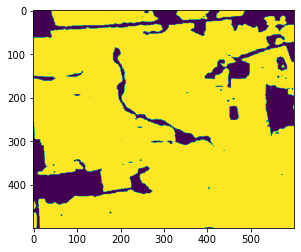

In [758]:
plt.imshow(all_pic2[5])
plt.show()

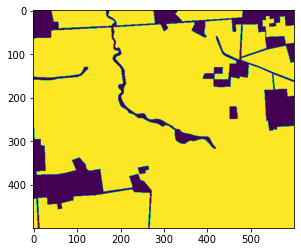

In [759]:
plt.imshow(all_pic[5])
plt.show()

In [760]:
import numpy as np

In [761]:
all_pic[all_pic == 255] = 1
all_pic2[all_pic2 == 255] = 1
np.sum(all_pic2[all_pic2 == 255])

0

In [762]:
D = all_pic[0] - all_pic2[0]


In [763]:
all_pic2[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [764]:
#每个像素的绝对距离
a = np.array([[0,1,1],[1,0,0]])
b = np.array([[1,0,0],[1,0,0]])
a == b

array([[False, False, False],
       [ True,  True,  True]])

In [765]:
np.sum(all_pic[0] == all_pic2[0])/(500*600)

0.89559

In [766]:
#绝对距离
distance = []
for i in range(8):
    a= np.sum(all_pic[i]==all_pic2[i]) / (500*600)
    distance.append(a)
distance

[0.89559,
 0.95989,
 0.9079666666666667,
 0.9135233333333334,
 0.9292366666666667,
 0.95606,
 0.9440833333333334,
 0.94245]

In [767]:
#占比差/占比

In [768]:
place_1=[]
place_2=[]
for i in range(8):
    place_1.append(np.sum(np.sum(all_pic2[i]))/(500*600))
    place_2.append(np.sum(np.sum(all_pic[i]))/(500*600))

In [769]:
place_1

[0.79119,
 0.8633233333333333,
 0.6808333333333333,
 0.7346666666666667,
 0.5287366666666666,
 0.8519633333333333,
 0.6687,
 0.8589133333333333]

In [770]:
place_2

[0.8329266666666667,
 0.8422666666666667,
 0.70042,
 0.7468366666666667,
 0.5533533333333334,
 0.8556166666666667,
 0.6802366666666667,
 0.8389366666666667]

In [771]:
arr_1=np.array(place_1)

In [772]:
arr_2=np.array(place_2)

In [773]:
#均方误差

In [774]:
a=(sum((arr_1-arr_2)**2))/8

In [775]:
a

0.00048357099722222397

In [776]:
#均方根误差

In [777]:
a**0.5

0.021990247775371334

In [778]:
#平均并交比

In [779]:
import numpy as np
import glob
import tqdm
from PIL import Image
import cv2 as cv
import os
from sklearn.metrics import confusion_matrix,cohen_kappa_score
from skimage import io
from skimage import measure
from scipy import ndimage
from sklearn.metrics import f1_score

In [780]:
def compute_f1(prediction, target):
    """
    :param prediction: 2d array, int,
            estimated targets as returned by a classifier
    :param target: 2d array, int,
            ground truth
    :return:
        f1: float
    """
    prediction.tolist(), target.tolist()
    img, target = np.array(prediction).flatten(), np.array(target).flatten()
    f1 = f1_score(y_true=target, y_pred=img)
    return  f1

In [781]:
list_f1=[]

In [782]:
for i in range(8):
    list_f1.append(compute_f1(all_pic2[i],all_pic[i]))

In [783]:
list_f1

[0.9357127464160006,
 0.9764832110882452,
 0.9333696932254762,
 0.9416291109706131,
 0.9346049466002518,
 0.9742676770634464,
 0.9585475967490444,
 0.9661041905939864]

In [784]:
def mean_iou(input, target, classes = 2):
    """  compute the value of mean iou
    :param input:  2d array, int, prediction
    :param target: 2d array, int, ground truth
    :param classes: int, the number of class
    :return:
        miou: float, the value of miou
    """
    miou = 0
    for i in range(classes):
        intersection = np.logical_and(target == i, input == i)
        # print(intersection.any())
        union = np.logical_or(target == i, input == i)
        temp = np.sum(intersection) / np.sum(union)
        miou += temp
    return  miou/classes

In [785]:
list_mean_iou=[]

In [786]:
for i in range(8):
    list_mean_iou.append(mean_iou(all_pic2[i],all_pic[i],classes=2))

In [787]:
list_mean_iou

[0.7222079713591094,
 0.8571203987596903,
 0.8080497928926798,
 0.8019054215273664,
 0.8670449343092301,
 0.8442793735430931,
 0.8811052165214877,
 0.8072210096592527]

In [680]:
def iou(input, target, classes=1):
    
    intersection = np.logical_and(target == classes, input == classes)
    
    union = np.logical_or(target == classes, input == classes)
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [681]:
list_iou=[]

In [682]:
for i in range(8):
    list_iou.append(iou(all_pic2[i],all_pic[i],classes=1))

In [683]:
list_iou

[0.8791919129586275,
 0.9540470871283726,
 0.8750639160516397,
 0.8896967223221385,
 0.8772379256106587,
 0.9498264364666119,
 0.9203950115789074,
 0.9344308989404124]

In [684]:
def compute_kappa(prediction, target):
    """
    :param prediction: 2d array, int,
            estimated targets as returned by a classifier
    :param target: 2d array, int,
            ground truth
    :return:
        kappa: float
    """
    prediction.tolist(), target.tolist()
    img, target = np.array(prediction).flatten(), np.array(target).flatten()
    kappa = cohen_kappa_score(target, img)
    return  kappa

In [685]:
list_kappa = []
for i in range(8):
    list_kappa.append(compute_kappa(np.array(all_pic2[i],dtype=int),np.array(all_pic[i],dtype=int)))

In [686]:
list_kappa

[0.6589136495280412,
 0.8403855689686603,
 0.7847247849450503,
 0.7748890576084091,
 0.857600024497688,
 0.8240090613268908,
 0.8726817496409583,
 0.7758102774806207]

In [687]:
list_acc=[]

In [688]:
for i in range(8):
    matrix = confusion_matrix(y_true=np.array(all_pic[i]).flatten(), y_pred=np.array(all_pic2[i]).flatten())
    acc = np.diag(matrix).sum() / matrix.sum()
    list_acc.append(acc)

In [689]:
list_acc

[0.89559,
 0.95989,
 0.9079666666666667,
 0.9135233333333334,
 0.9292366666666667,
 0.95606,
 0.9440833333333334,
 0.94245]

In [690]:
"""
refer to https://github.com/jfzhang95/pytorch-deeplab-xception/blob/master/utils/metrics.py
"""
import numpy as np
__all__ = ['SegmentationMetric']
 
"""
confusionMetric  # 注意：此处横着代表预测值，竖着代表真实值，与之前介绍的相反
P\L     P    N
P      TP    FP
N      FN    TN
"""
class SegmentationMetric(object):
    def __init__(self, numClass):
        self.numClass = numClass
        self.confusionMatrix = np.zeros((self.numClass,)*2)
 
    def pixelAccuracy(self):
        # return all class overall pixel accuracy
        #  PA = acc = (TP + TN) / (TP + TN + FP + TN)
        acc = np.diag(self.confusionMatrix).sum() /  self.confusionMatrix.sum()
        return acc
 
    def classPixelAccuracy(self):
        # return each category pixel accuracy(A more accurate way to call it precision)
        # acc = (TP) / TP + FP
        classAcc = np.diag(self.confusionMatrix) / self.confusionMatrix.sum(axis=1)
        return classAcc # 返回的是一个列表值，如：[0.90, 0.80, 0.96]，表示类别1 2 3各类别的预测准确率
 
    def meanPixelAccuracy(self):
        classAcc = self.classPixelAccuracy()
        meanAcc = np.nanmean(classAcc) # np.nanmean 求平均值，nan表示遇到Nan类型，其值取为0
        return meanAcc # 返回单个值，如：np.nanmean([0.90, 0.80, 0.96, nan, nan]) = (0.90 + 0.80 + 0.96） / 3 =  0.89
 
    def meanIntersectionOverUnion(self):
        # Intersection = TP Union = TP + FP + FN
        # IoU = TP / (TP + FP + FN)
        intersection = np.diag(self.confusionMatrix) # 取对角元素的值，返回列表
        union = np.sum(self.confusionMatrix, axis=1) + np.sum(self.confusionMatrix, axis=0) - np.diag(self.confusionMatrix) # axis = 1表示混淆矩阵行的值，返回列表； axis = 0表示取混淆矩阵列的值，返回列表 
        IoU = intersection / union  # 返回列表，其值为各个类别的IoU
        mIoU = np.nanmean(IoU) # 求各类别IoU的平均
        return mIoU
 
    def genConfusionMatrix(self, imgPredict, imgLabel): # 同FCN中score.py的fast_hist()函数
        # remove classes from unlabeled pixels in gt image and predict
        mask = (imgLabel >= 0) & (imgLabel < self.numClass)
        label = self.numClass * imgLabel[mask] + imgPredict[mask]
        count = np.bincount(label, minlength=self.numClass**2)
        confusionMatrix = count.reshape(self.numClass, self.numClass)
        return confusionMatrix
 
    def Frequency_Weighted_Intersection_over_Union(self):
        # FWIOU =     [(TP+FN)/(TP+FP+TN+FN)] *[TP / (TP + FP + FN)]
        freq = np.sum(self.confusion_matrix, axis=1) / np.sum(self.confusion_matrix)
        iu = np.diag(self.confusion_matrix) / (
                np.sum(self.confusion_matrix, axis=1) + np.sum(self.confusion_matrix, axis=0) -
                np.diag(self.confusion_matrix))
        FWIoU = (freq[freq > 0] * iu[freq > 0]).sum()
        return FWIoU
 
 
    def addBatch(self, imgPredict, imgLabel):
        assert imgPredict.shape == imgLabel.shape
        self.confusionMatrix += self.genConfusionMatrix(imgPredict, imgLabel)
 
    def reset(self):
        self.confusionMatrix = np.zeros((self.numClass, self.numClass))
 
 
if __name__ == '__main__':
    list_pa=[]
    list_cpa=[]
    list_mpa=[]
    for i in range(8):
        imgPredict = np.array(all_pic[i],dtype=int) # 可直接换成预测图片
        imgLabel = np.array(all_pic2[i],dtype=int) # 可直接换成标注图片
        metric = SegmentationMetric(2) # 3表示有3个分类，有几个分类就填几
        metric.addBatch(imgPredict, imgLabel)
        pa = metric.pixelAccuracy()
        cpa = metric.classPixelAccuracy()
        mpa = metric.meanPixelAccuracy()
        mIoU = metric.meanIntersectionOverUnion()
        list_pa.append(pa)
        list_cpa.append(cpa[0])
        list_mpa.append(mpa)
    

In [691]:
list_pa

[0.89559,
 0.95989,
 0.9079666666666667,
 0.9135233333333334,
 0.9292366666666667,
 0.95606,
 0.9440833333333334,
 0.94245]

In [692]:
list_cpa

[0.6500486886004821,
 0.9302977830890423,
 0.8251383812010444,
 0.814108040201005,
 0.898803924203736,
 0.839251536781428,
 0.8981990139853104,
 0.8668430751783773]

In [693]:
list_mpa

[0.8052208415596436,
 0.9474363311673739,
 0.8859669874181477,
 0.8817681761803573,
 0.927582656965726,
 0.9078040546236896,
 0.9325076122715545,
 0.910856203096768]

In [794]:
import gdal
import numpy as np
import cv2

#  读取tif数据集


def readTif(fileName, xoff=0, yoff=0, data_width=0, data_height=0):
    dataset = gdal.Open(fileName)

    #  栅格矩阵的列数,行数,波段数
    # width = dataset.RasterXSize
    # height = dataset.RasterYSize
    # bands = dataset.RasterCount

    #  获取数据
    if data_width 0:
        data_width = dataset.RasterXSize
    if data_height 0:
        data_height = dataset.RasterYSize
    data = dataset.ReadAsArray(xoff, yoff, data_width, data_height)

    #  获取仿射矩阵信息,投影信息
    geotrans = dataset.GetGeoTransform()
    proj = dataset.GetProjection()
    return data, geotrans, proj


#  保存tif文件函数
def writeTiff(im_data, im_geotrans, im_proj, path):
    if 'int8' in im_data.dtype.name:
        datatype = gdal.GDT_Byte
    elif 'int16' in im_data.dtype.name:
        datatype = gdal.GDT_UInt16
    else:
        datatype = gdal.GDT_Float32

    if len(im_data.shape) == 2:
        im_data = np.array([im_data])
    im_bands, im_height, im_width = im_data.shape

    # 创建文件
    driver = gdal.GetDriverByName("GTiff")
    dataset = driver.Create(path, im_width, im_height, im_bands, datatype)
    if (dataset is not None):
        dataset.SetGeoTransform(im_geotrans)  # 写入仿射变换参数
        dataset.SetProjection(im_proj)  # 写入投影
    for i in range(im_bands):
        dataset.GetRasterBand(i + 1).WriteArray(im_data[i])
    del dataset


im_data, im_geotrans, im_proj = readTif("output/caijian.tif", 0, 0, 520, 256)
# im_data = np.transpose(im_data,(1,2,0))
# print(im_data.shape)
# img = cv2.imshow("",im_data[:,:,::-1]) # RGB2BGR
# cv2.waitKey(0)

im_data2, _, _ = readTif("output/pred_final.png", 0, 0, -1, -1)
writeTiff(im_data2, im_geotrans, im_proj, "output/save.tif")

SyntaxError: invalid syntax (<ipython-input-794-e5df0f39a929>, line 17)